# Evaluation for Classification

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:   ', y[1:30])
print('New Binary labels: ', y_binary_imbalanced[1:30])

Original labels:    [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New Binary labels:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)

array([1615,  182], dtype=int64)

In [4]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                   random_state=0)

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9088888888888889

#### Dummy Classifiers

In [5]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

## Confusion Matrices

In [8]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

In [9]:
print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [10]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Stratified class (dummy classifier)\n', confusion)

Stratified class (dummy classifier)
 [[362  45]
 [ 36   7]]


In [11]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)

y_svm_linear_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, y_svm_linear_predicted)

print('svm - linear classifier\n', confusion)

svm - linear classifier
 [[402   5]
 [  5  38]]


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic classifier\n', confusion)

Logistic classifier
 [[401   6]
 [  6  37]]


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, dt_predicted)

print('Decision Tree Classfier (max depth=2)\n', confusion)

Decision Tree Classfier (max depth=2)
 [[400   7]
 [ 17  26]]


## Evaluation metrics for binary classification

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, dt_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, dt_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, dt_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, dt_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [16]:
print('Random class-proportional (dummy)\n',
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))

print('SVM\n',
      classification_report(y_test, y_svm_linear_predicted, target_names=['not 1', '1']))

print('Logistic Regression\n',
      classification_report(y_test, lr_predicted, target_names=['not 1', '1']))

print('Decision tree\n',
      classification_report(y_test, dt_predicted, target_names=['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.91      0.89      0.90       407
          1       0.13      0.16      0.15        43

avg / total       0.84      0.82      0.83       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic Regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision Functions

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                   random_state=0)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

y_score_list

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.72250047336062),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.749345951179265),
 (1, 5.23490021249531),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

In [18]:
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

y_proba_list

[(0, 8.60108727067405e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.683793414513379e-09),
 (0, 5.832940124078156e-05),
 (1, 0.9947008742687163),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.56980024484208e-10),
 (0, 1.992053353707062e-05),
 (0, 6.706507243234968e-06),
 (0, 1.70461945380572e-05),
 (1, 0.9999864056960567),
 (0, 9.853591296551983e-13),
 (0, 2.600937459498366e-06),
 (0, 5.944289259618554e-12)]

## multiclass confusion matrix

In [19]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y,
                                                   random_state=0)


<IPython.core.display.Javascript object>


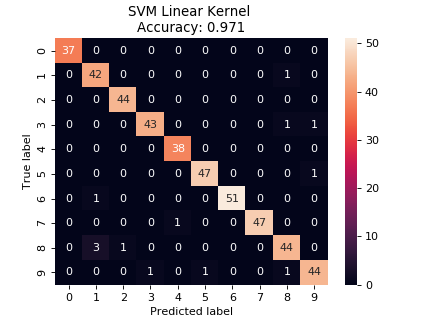

<IPython.core.display.Javascript object>


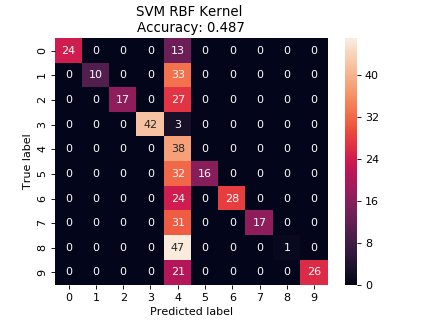

Text(0.5,14.7222,'Predicted label')

In [20]:
SVM = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = SVM.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy: {0:.3f}'
          .format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

SVM = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = SVM.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy: {0:.3f}'
          .format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [21]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



In [22]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
     .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
     .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [23]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
     .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
     .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear_model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


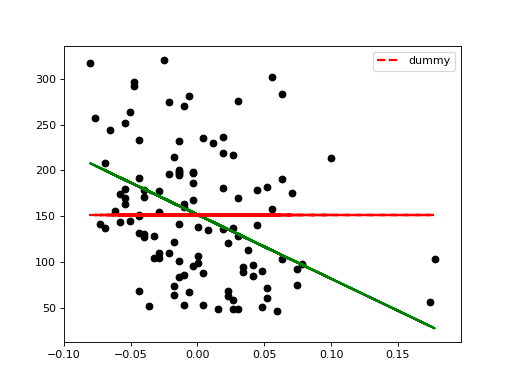

In [33]:
% matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Mean squared error (dummy): {:.2f}'
     .format(mean_squared_error(y_test, y_predict_dummy_mean)))
print('Mean squared error (linear_model): {:.2f}'
     .format(mean_squared_error(y_test, y_predict)))
print('r2_score (dummy): {:.2f}'
     .format(r2_score(y_test, y_predict_dummy_mean)))
print('r2_score (linear model): {:.2f}'
     .format(r2_score(y_test, y_predict)))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed',
        linewidth=2, label = 'dummy')
plt.legend()
plt.show();

## Model selection using evaluation metrics

### Cross-validation example

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

print('Cross-validation (accuracy)',
     cross_val_score(clf, X, y, cv=5))
print('Cross-validation (AUC)',
     cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Cross-validation (recall)',
     cross_val_score(clf, X, y, cv=5, scoring='recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### grid search example

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter(max. accuracy):', grid_clf_acc.best_params_)
print('grid best score (accuracy): ', grid_clf_acc.best_score_)

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values,
                           scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter(max. AUC):', grid_clf_auc.best_params_)
print('grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter(max. accuracy): {'gamma': 0.001}
grid best score (accuracy):  0.9962880475129918
Test set AUC:  0.99982858122393
Grid best parameter(max. AUC): {'gamma': 0.001}
grid best score (AUC):  0.9998741278302142


In [39]:
from sklearn.metrics.scorer import SCORERS

sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [ ]:
#print(m)
y_scores_lr = m.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()